# <center>Régression linéaire : une introduction</center>

*Références* :
- [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/), Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani. 
- Introduction à la régression linéaire, 2020, J-F. Bercher.

Dans cette séance, les librairies suivantes seront utilisées.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression

## Table des matières

<p><div class="lev1"><a href="#1-Introduction"><span class="toc-item-num">1 - </span>Introduction</a></div>
<p><div class="lev2"><a href="#1-1-Régression-et-classification"><span class="toc-item-num">1-1 </span>Régression et classification</a></div>
<p><div class="lev2"><a href="#1-2-Jeu-de-données-et-vocabulaire"><span class="toc-item-num">1-2 </span>Jeu de données et vocabulaire</a></div>
<p><div class="lev2"><a href="#1-3-Problématique"><span class="toc-item-num">1-3 </span>Problématique</a></div>
<p><div class="lev1"><a href="#2-Régression-linéaire-simple"><span class="toc-item-num">2 - </span>Régression linéaire simple</a></div>
<p><div class="lev2"><a href="#2-1-Modélisation"><span class="toc-item-num">2-1 </span>Modélisation</a></div>
<p><div class="lev2"><a href="#2-2-Ajustement-d'une-droite-de-régression-à-un-nuage-de-points"><span class="toc-item-num">2-2 </span>Ajustement d'une droite de régression à un nuage de points</a></div>
<p><div class="lev1"><a href="#3-Régression-linéaire-:-cas-multivarié"><span class="toc-item-num">3 - </span>Régression linéaire : cas multivarié</a></div>
<p><div class="lev2"><a href="#3-1-Modélisation"><span class="toc-item-num">3-1 </span>Modélisation</a></div>
<p><div class="lev2"><a href="#3-2-Estimation-des-paramètres-du-modèle"><span class="toc-item-num">3-2 </span>Estimation des paramètres du modèle</a></div>
<p><div class="lev1"><a href="#4-Evaluation-des-performances"><span class="toc-item-num">4 - </span>Evaluation des performances</a></div>
<p><div class="lev2"><a href="#4-1-Residual-standard-error-(RSE)"><span class="toc-item-num">4-1 </span>Residual standard error (RSE)</a></div>
<p><div class="lev2"><a href="#4-2-Coefficient-de-détermination-$R^2$"><span class="toc-item-num">4-2 </span>Coefficient de détermination $R^2$</a></div>
<p><div class="lev2"><a href="#4-3-Intervalles-de-confiance"><span class="toc-item-num">4-3 </span>Intervalles de confiance</a></div>
<p><div class="lev2"><a href="#4-4-Etude-des-résidus"><span class="toc-item-num">4-4 </span>Etude des résidus</a></div>
<p><div class="lev1"><a href="#5-Cas-des-variables-catégorielles"><span class="toc-item-num">5 - </span>Cas des variables catégorielles</a></div>
<p><div class="lev1"><a href="#6-Interaction-et-non-linéarité"><span class="toc-item-num">6 - </span>Interaction et non linéarité</a></div>
<p><div class="lev1"><a href="#6-1-Interaction-:-éliminer-l'hypothèse-d'additivité"><span class="toc-item-num">6-1 </span>Interaction : éliminer l'hypothèse d'additivité</a></div>
<p><div class="lev1"><a href="#6-2-Non-linéarité"><span class="toc-item-num">6-2 </span>Non-linéarité</a></div>
<p><div class="lev1"><a href="#7-Outliers"><span class="toc-item-num">7 - </span>Outliers</a></div>
<p><div class="lev1"><a href="#8-Colinéarité-et-corrélation"><span class="toc-item-num">8 - </span>Colinéarité et corrélation</a></div>
<p><div class="lev1"><a href="#9-Effet-de-la-mise-à-l'échelle"><span class="toc-item-num">9 - </span>Effet de la mise à l'échelle</a></div>
<p><div class="lev1"><a href="#Annexes"><span class="toc-item-num"></span>Annexes</a></div>

## 1 Introduction

La régression linéaire est une méthode d'apprentissage statistique simple mais efficace et couramment utilisée. Les concepts et le vocabulaire présentés dans ce cours sont des concepts incontournables de l'apprentissage statistique. Enfin, beaucoup de méthodes d'apprentissage statistique plus complexes sont des généralisations ou des extensions de la régression linéaire.  

### 1-1 Régression et classification

Avant de rentrer dans le vif du sujet, commençons par rappeler en quoi consiste la régression et la classification. La **régression - en toute généralité, pas nécessairement linéaire - a pour but de prédire une quantité** alors que la **classification prédit une classe (ou un label)**.

Exemple de tâches de régression :
- prédire le prix d'une habitation à partir de sa surface habitable, sa latitude, sa longitude, le nombre de chambres, ... (cours sur le feature engineering)
- prédire le prix d'un véhicule à partir de la puissance du moteur, la consommation de carburant, ... (TP 3 sur le feature engineering)
- prédire l'espérance de vie en fonction de l'année, du pays, ... (TP 1  Introduction générale : acquisition et exploration de données)

Exemple de tâches de classification :
- prédire le type de cancer (bénin ou malin) à partir de critères morphologiques (TP 2 sur le nettoyage de données)
- reconnaître le chiffre écrit à la main sur une image (TP 6 noté en optimisation et IA)
- reconnaître si une image donnée est celle d'un chat, d'une chauve-souris ou d'un pangolin

La classification comme la régression font partie de **l'apprentissage supervisé** : dans les deux cas on apprend à faire des prédictions à partir d'exemples annotés.


### 1-2 Jeu de données et vocabulaire

Dans tout ce cours, nous utiliserons comme fil rouge le jeu de données suivant.

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Ce jeu de données contient $7$ variables décrites ci-dessous

|Nom  |Description|Valeurs|
|-----|-----------|--------------------|
|age | âge | $\mathbb{N}$ |
|sex | sexe | {female,male} |
|bmi  | indice de masse corporelle  | $\mathbb{R}$   |
|children  | nombre d'enfants  | $\mathbb{N}$   |
|smoker | fumeur | {yes,no}|
|region |zone de résidence (aux Etats-Unis)| {northeast, southeast, southwest, northwest}|
|charges|frais médicaux | $\mathbb{R}$|

On aimerait prédire les coûts ('charges') à partir de 'age', 'sex', 'bmi', 'children', 'smoker' et 'region'.

La variable que l'on souhaite prédire est appelée **réponse** ou **variable dépendante** ou encore **variable à expliquer**.

Les variables qui vont nous servir à la prédiction (ici 'age', 'sex', 'bmi', 'children', 'smoker' et 'region') sont dénommées **prédicteurs** ou **variables explicatives** ou **features** ou encore **variables indépendantes**.

### 1-3 Problématique

Nous allons tout d'abord considérer uniquement les personnes fumeuses qui ne souffent pas d'obésité (bmi $<30$).

In [5]:
data_smoker=data[data['smoker']=='yes']
data_init=data_smoker[data_smoker['bmi']<30].copy()

Visualisons, d'une part, la relation entre les coûts et leur index naturel, et d'autre part, entre les coûts et l'âge de l'individu. 

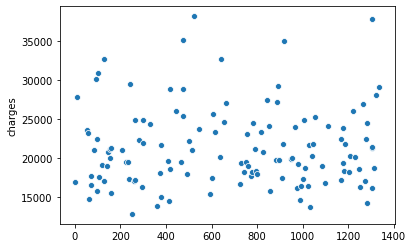

In [6]:
sns.scatterplot(x=data_init.index.values,y=data_init["charges"]);

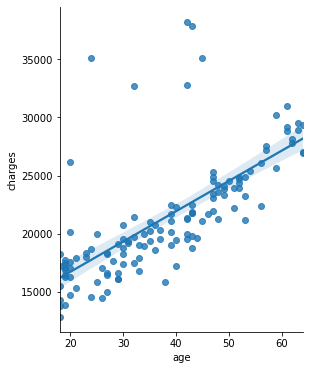

In [7]:
sns.pairplot(data_init, x_vars=["age"], y_vars=["charges"],height=5, aspect=.8, kind="reg");

Il semble manifestement qu'il y ait un lien entre les coûts et l'âge, et, a contrario, aucun lien entre les coûts et leur index.
 
Plus précisément, on observe une dépendance linéaire entre la variable indépendante 'age' et la variable dépendante 'charges'. 

La droite qui capture cette dépendance est appelée **droite de régression**. 

> <u>Question</u> $n^o$ $1$ :
>
> Comment trouve-t-on l'expression de cette droite ?

Supposons que l'on ait déterminé l'expression de cette droite :
$$y=\beta_0 +\beta_1 x$$

Alors si un nouvel individu (fumeur, non obèse) d'âge $x_0$ se présente, on prédit les coûts auxquels il doit s'attendre à partir de son âge comme étant de  $\beta_0+\beta_1 x_0$.

Cette droite de régression constitue le **modèle linéaire**.

> <u>Question</u> $n^o$ $2$: 
>
> Comment évaluer la précision du modèle ? Ou encore : comment garantir que le choix de $\beta_0$ et $\beta_1$ est le meilleur possible ?


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 2 Régression linéaire simple

### 2-1 Modélisation

On suppose que la relation entre la réponse $y_i$ et le prédicteur $x_i$ est donnée par 
$$\forall i\in \{1,...,n\},~~~y_i=\beta_0+\beta_1 x_i+\epsilon_i$$

où
- $n$ est le nombre d'observations contenues dans le jeu de données ;
- $\beta_0$ est appelé *l'intercept* (ou *coefficient* ou *paramètre*) ;
- $\beta_1$ est la pente, appelé *coefficient* ou *paramètre* également ;
- $\epsilon_i$ est un terme d'erreur : il exprime à la fois une erreur sur le modèle (si la vraie relation sous-jacente entre $y_i$ et $x_i$ n'est pas linéaire), le fait que la variable $x_i$ n'explique peut-être pas complètement $y_i$ et le fait qu'il y a peut-être des erreurs de mesures sur les valeurs relevées de $y_i$. 

### 2-2 Ajustement d'une droite de régression à un nuage de points

Visualisons (source : [ici](http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/)) les erreurs entre la droite de régression et la réalisation pour chaque observation.

<img src="error.png">

Intuitivement, on cherche une valeur pour $\beta_0$ et $\beta_1$ telle que les erreurs $e_i$, appelés **résidus** (à ne pas confondre avec les $\epsilon_i$ de la modélisation) vont être ''globalement minimales''.

Formellement, le critère retenu pour estimer $\beta_0$ et $\beta_1$ est le critère des moindres carrés : il s'agit simplement de minimiser la **somme des carrés des résidus** (*residual sum of squares*) :
$$RSS({\beta}_0,{\beta}_1)=\sum_{i=1}^{n} \left(y_i - \beta_0 -\beta_1 x_i \right)^2 $$

On appelle cette fonction une **fonction de coût** (*loss function*).

<u>Remarque</u> : La technique de régression linéaire basée sur ces moindres carrés est souvent dénommée OLS pour *Ordinary Least Squares* dans la littérature.

On estimera $\beta_0$ et $\beta_1$ (inconnus) par les estimateurs notés $\hat{\beta}_0$ et $\hat{\beta}_1$ respectivement, donnés par :
 $$(\hat{\beta}_0,\hat{\beta}_1)=\underset{\beta_0,\beta_1}{\arg\min}~RSS({\beta}_0,{\beta}_1)$$
 
Les méthodes classiques de recherche de minimum global nous donne (voir Annexes et vidéo du cours) :
$$\hat{\beta_0}=\frac{1}{N}\sum_{i=1}^{N}(y_i-\beta_1 x_i )=\bar{y}-\beta_1\bar{x}$$
en notant $\bar{x}=\frac{1}{N}\sum_{i=1}^{N}x_i$ et $\bar{y}=\frac{1}{N}\sum_{i=1}^{N}y_i$ (moyennes des $x_i$ et des $y_i$ respectivement).

$$\hat{\beta_1}=\frac{\sum_{i=1}^{N} (y_i -\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N} (x_i-\bar{x})^{2}}$$

Le coefficient $\hat{\beta_1}$ dépend donc du rapport de l'estimée de la covariance entre $X=(x_1,\dots,x_n)$ et $Y=(y_1,\dots,y_n)$ à l'estimée de la variance de X :  
$$
\beta_1=\frac{\hat{cov}(X,Y)}{\sigma_X^2} 
$$
c'est-à-dire, à un facteur près, du coefficient de corrélation entre $X$ et $Y$. Il est ainsi instructif de constater que le coefficient de prédiction est directement lié au coefficient de corrélation entre les variables dépendante et explicative.

Ainsi, étant donné une nouvelle observation $x_j$, la prédiction correspondante sera : $\hat{y}_j=\hat{\beta}_0+\hat{\beta}_1 x_j$

<u>Remarque</u> : $\hat{y}$ indique une prédiction faite à partir de la variables $X = x$.
Le symbole $\hat{}$ dénote une valeur estimée.

La fonction <span style="border:1px; border-style:solid">LinearRegressor</span> se trouvant dans <u>sklearn.linear_model</u> permet de trouver l'intercept et la pente.

In [8]:
#Créer le modéle linéaire
regr = LinearRegression()
#On utilise l'âge
X = data_init[['age']]
y = data_init.charges
#On ajuste les paramètres du modéle linéaire
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[260.63975921]
11503.356357662233


L'étape suivante est d'étudier la qualité du modèle. Avant de se pencher sur cela, nous allons tout d'abord généraliser le travail ci-dessus au cas où nous avons plusieurs prédicteurs : cela s'appelle la *régression multiple*.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 3 Régression linéaire : cas multivarié

Toujours sur le même jeu de données, on observe qu'il y a également une relation linéaire entre le coût et le l'indice de masse corporelle ('bmi') des individus.

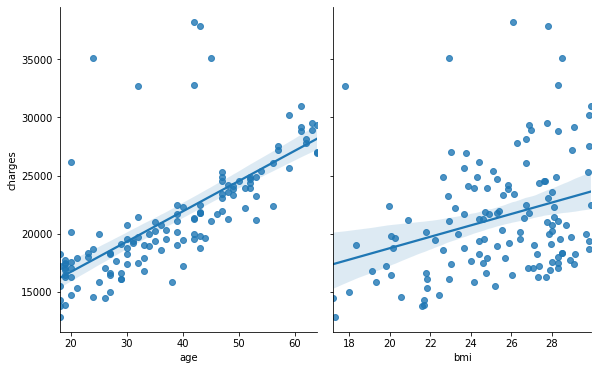

In [9]:
sns.pairplot(data_init, x_vars=["age","bmi"], y_vars=["charges"],height=5, aspect=.8, kind="reg");

Ainsi, expliquer le coût en fonction de l'âge uniquement est très restrictif. On peut raisonnablement poser le modèle :
<center>charges $=\beta_0$ +$\beta_1 \times \text{age} +\beta_2 \times$ bmi </center>

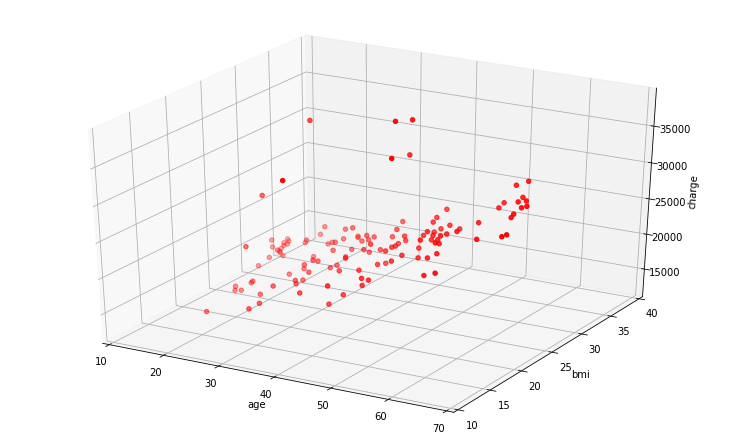

In [10]:
# Create plot
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)

ax.scatter3D(data_init['age'],  data_init['bmi'], data_init['charges'], c='r')
ax.set_xlabel('age')
ax.set_xlim(10,70)
ax.set_ylabel('bmi')
ax.set_ylim(10,40)
ax.set_zlabel('charge');

### 3-1 Modélisation

On généralise le modèle linéaire à une seule variable en faisant l'hypothèse que la variable *dépendante* $Y$ peut s'expliquer en fonction de plusieurs  variables *indépendantes* $X_1, \ldots, X_p$. On suppose à nouveau que la relation est une  dépendance **linéaire**. Le modèle prend alors la forme

$$Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$

où les $\beta_i$ sont les coefficients du modèle et $\epsilon$ est le terme d'erreur comme précédemment.

On dispose de $n$ observations qui, par hypothèse, vérifient :
\begin{equation}\label{eq}\tag{1}
\forall i\in \{1,n\}, y_i=\beta_0+\beta_1 x_{1}^{i}+\beta_2 x_{2}^{i}+\dots+\beta_p x_{p}^{i}+\epsilon_i
\end{equation}

Ces observations vont nous permettre d'estimer les paramètres par des valeurs $\hat{\beta}_0,\hat{\beta}_1,\dots,\hat{\beta}_p$. Avec ces estimations, on pourra prédire la valeur de la reponse étant donnée une nouvelle observation $x^{new}=(x_{1}^{new},\dots,x_{p}^{new})$ par :

$$\hat{y}^{new}= \hat{\beta}_0 +\hat{\beta}_1 x_{1}^{new}+\dots \hat{\beta}_p x_{p}^{new}$$




### 3-2 Estimation des paramètres du modèle

Afin d'estimer les paramètres du modèle, le critère à minimiser est le critère des moindres carrés : la somme des carrées des résidus (residuals sum of square) :

\begin{equation}
RSS({\boldsymbol{\beta}})=\sum_{i=1}^{n}\left(y_i - \left(\beta_0+\beta_1 x_{1}^{i} + \dots + \beta_p x_{p}^{i}\right)\right)^2
\end{equation}

En notant ${\boldsymbol{y}}=\begin{pmatrix} y_1\\ y_2 \\ \vdots \\ y_n \end{pmatrix}$, ${\boldsymbol{\beta}}=\begin{pmatrix} \beta_0\\ \beta_1\\ \vdots\\ \beta_p\end{pmatrix}$, ${\boldsymbol{X}}=\begin{pmatrix} 1 & x_1^1 & \dots & x_p^1\\ 1&  x_1^2 & \dots & x_p^2\\ \vdots & \vdots & \vdots &\vdots\\ 1 & x_1^n & \dots & x_p^n\\  \end{pmatrix}$ et ${\boldsymbol{\epsilon}}=\begin{pmatrix}\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{pmatrix}$, le système d'équations \eqref{eq} s'écrit :

$$\boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\epsilon} $$

De même le RSS s'écrit (avec $\|\cdot\|$ la norme euclidienne) :

$$\|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\|^2 $$

ou encore :

$$\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^{T}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) $$

avec $\boldsymbol{X}^T$ la transposée de $\boldsymbol{X}.$


Le critère RSS est donc une forme quadratique en les $(p+1)$ paramètres inconnus. Si $\boldsymbol{X}^T \boldsymbol{X}$ est définie positive, alors la fonction $\boldsymbol{\beta} \mapsto RSS(\boldsymbol{\beta})$ est strictement convexe et admet donc un unique minimum au point annulant le gradient. On calcule le gradient (voir Annexes pour les détails calculatoires) :
$$
\frac{\partial RSS(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -2 \boldsymbol{X}^T \left( \boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}\right). 
$$

Le gradient s'annule pour $\boldsymbol{\beta}$ vérifiant :

$$\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}=\boldsymbol{X}^T \boldsymbol{y}$$

Comme $\boldsymbol{X}^T\boldsymbol{X}$ est inversible (car définie positive), alors on obtient :

$$\boldsymbol{\beta}=\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T \boldsymbol{y}$$

<u>Remarque</u> : si $\boldsymbol{X}$ est de rang colonne plein, c'est-à-dire si les colonnes de $X$ sont linéairement indépendantes, alors $\boldsymbol{X}^T\boldsymbol{X}$ est définie positive.


In [11]:
#estimer les paramètres du modèle
regr = LinearRegression()
X = data_init[['age', 'bmi']]
y = data_init.charges
regr.fit(X,y)

print(regr.coef_)
print(regr.intercept_)
print(regr.rank_)

[253.70939145 412.63676044]
1319.516863009776
2


<u>Interprétation</u>. Dans un scénario idéal, si les prédicteurs ne sont pas corrélés, un changement d'une unité dans la feature 'age' est associé à une augmentation de la réponse 'charges' d'environ $254$ unités. Cependant, si les variables 'age' et 'bmi' sont corrélées, un changement d'une unité dans la feature 'age' change tout le reste : l'interprétation devient hasardeuse.

In [12]:
#Avec cette fonction de sklearn, on peut opter pour forcer l'intercept beta_0 à 0
regr0 = LinearRegression(fit_intercept=False)

X = data_init[['age','bmi']]
y = data_init.charges

regr0.fit(X,y)
print(regr0.coef_)
print(regr0.intercept_)
print(regr0.rank_)

[256.82241203 459.37285016]
0.0
2


In [13]:
#faire une prédiction
X_new=np.array([[35,24.9],[21,21.3]])
regr.predict(X_new)

array([20474.00089865, 15436.57708081])

In [14]:
#que se passe-t-il si on rajoute une colonne linéairement dépendante d'une autre ?
data_init['age2']=data_smoker[data_smoker['bmi']<30]['age']

In [15]:
data_init.head()

,age,sex,bmi,children,smoker,region,charges,age2
0,19,female,27.90,0,yes,southwest,16884.9240,19
11,62,female,26.29,0,yes,southeast,27808.7251,62
52,48,male,28.00,1,yes,southwest,23568.2720,48
58,53,female,22.88,1,yes,southeast,23244.7902,53
64,20,female,22.42,0,yes,northwest,14711.7438,20


In [16]:
#créer le modèle et estimer ses paramètres
regr_col = LinearRegression()
X_col = data_init[['age', 'bmi','age2']]
y_col = data_init.charges
regr_col.fit(X_col,y_col)
print('Paramètres du modèle avec même colonne deux fois : ')
print(regr_col.coef_)
print(regr_col.intercept_)
print(regr_col.rank_)
print('\n')
print('Paramètres du modèle avec deux colonnes différentes : ')
print(regr.coef_)
print(regr.intercept_)

Paramètres du modèle avec même colonne deux fois : 
[126.85469572 412.63676044 126.85469572]
1319.5168630097905
2


Paramètres du modèle avec deux colonnes différentes : 
[253.70939145 412.63676044]
1319.516863009776


In [17]:
#Si on voulait résoudre le système de manière 'brute', on obtiendrait une erreur :
M=data_init[['age', 'bmi','age2']]
np.linalg.inv(M.T@M)

LinAlgError: Singular matrix

<u>Remarque</u> : Le critère RSS est le critère le plus communément utilisé lorsque l'on travaille en régression. Il a notamment deux caractéristiques intéressantes. Prendre le carré des erreurs (au lieu par exemple de la valeur absolue) nous permet :
- d'avoir une fonction dérivable/différentiable ;
- de pénaliser plus fortement les valeurs très loin de la cible et moins les valeurs proches.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 4 Evaluation des performances

Lorsque l'on effectue une régression linéaire multiple, on doit s'intéresser aux questions suivantes : 

1. Quelle est la qualité de la prédiction des nouvelles données ?
2. Quelle est la qualité de la régression ? 

### 4-1 Residual standard error (RSE)

Dans la modélisation proposée, chaque observation est associée à un terme d'erreur ($\epsilon_i$). De ce fait même si l'on connaissait les valeurs exactes des $\beta_i$, on ne pourrait pas prédire parfaitement $y_i$ à partir des variables explicatives. 

On va maintenant se donner les hypothèses suivantes sur les termes d'erreur :
$$\forall i \in \{1,n\},~~~\mathbb{E}(\epsilon_i)=0~~~~ \text{et}~~~~Var(\epsilon_i)=\sigma^2$$

En particulier, tous les $\epsilon_i$ ont la <u>même</u> variance : on parle d'homoscédasticité.

Le RSE est une estimation de l'écart-type $\sigma$ de l'erreur :

$$
RSE = \sqrt{\frac{RSS}{n-p-1} }.
$$

Examinons le RSE obtenu sur notre modèle à deux prédicteurs.

In [18]:
(n,p)=data_init[['age', 'bmi']].shape
print(n)
print(p)

129
2


In [19]:
y_pred=regr.predict(data_init[['age', 'bmi']])
print(y_pred[:5])
print(data_init['charges'].head(5))

[17652.56091685 27897.7195647  25051.39694481 24207.24368857
 15645.02086106]
0     16884.9240
11    27808.7251
52    23568.2720
58    23244.7902
64    14711.7438
Name: charges, dtype: float64


In [20]:
RSE_init=np.sqrt( sum((data_init['charges']-y_pred)**2)/(n-p-1)  )
print(RSE_init)

3435.178940257978


In [21]:
RSE_init/np.mean(data_init['charges'])

0.16079876629489762

Une façon d'interpréter le RSE sur ce jeu de données est de dire que même si l'on connaissait parfaitement les $\beta_i$, une prédiction serait encore faite à $3435$ \\$ près. Bien évidemment, savoir si $3435$ \\$ d'imprécision est acceptable dépend des données. Sur cette étude, cela signifie que le pourcentage d'erreur est de $16$ \%.

On pourra comprendre le RSE comme une mesure d'erreur de modèle, ou d'insuffisance du modèle. Si les prédictions sont proches des vraies valeurs, alors le RSE sera petit. A l'inverse si il est grand, cela indique que le modèle n'est pas bien ajusté aux données. 

<u>Remarque</u> : $n-p-1$ est le *degré de liberté* du modèle (nombre d'observations moins nombre de paramètres du modèle). 

### 4-2 Coefficient de détermination $R^2$

Le RSE est mesuré sur la même échelle que $Y$ (donc sensible à l'échelle de travail -- ne permet pas de comparer des modèles entre eux), et ne mesure pas le gain apporté par la modélisation. L'idée est donc de se donner une référence comme étant l'erreur en l'absence de modélisation et de normaliser les choses vis-à-vis de cette référence. 

En l'absence de variable explicative, le modèle ne comprend donc que $\beta_0$. Vous montrerez facilement que dans ce cas on obtient $\hat{\beta}_0 = \bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$ (c'est-à-dire que l'on va toujours prédire pour une nouvelle observation la moyenne des valeurs que l'on a déjà observées - cela doit vous rappeler le cours sur l'imputation de données manquantes). On appelle **TSS** (*total sum of squares*) la somme des carrés des erreurs correspondantes (c'est-à-dire le RSS correspondant)

$$
TSS = \sum_{i=1}^n  \left(y_i - \bar{y} \right)^2. 
$$

Bien entendu le RSS pour un modèle plus complet -- par exemple avec un prédicteur, est nécessairement plus faible car on cherche alors à minimiser $\sum_{i=1}^n  \left(y_i - \beta_0 - \beta_1 x_{i} \right)^2$ et on obtiendra le TSS dans le "pire cas" où $\hat{\beta}_1=0$. On peut montrer que l'on a exactement (c'est un théorème de Pythagore)

$$
\sum_{i=1}^n  \left({y}_i - \bar{y} \right)^2  = \sum_{i=1}^n  \left({y}_i - \hat{y}_i \right)^2  + \sum_{i=1}^n  \left(\hat{y}_i - \bar{y} \right)^2, 
$$
soit

$$
TSS = RSS + ESS
$$
où ESS vaut pour *Explained Sum of Squares* et représente la part de la variance globale qui est expliquée par le modèle. Il ne reste plus qu'à normaliser, et on pose alors

$$
R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}
$$
qui représente la proportion de la variance expliquée. 

In [22]:
from sklearn.metrics import r2_score
R2_init=r2_score(data_init['charges'],y_pred)
print(R2_init)

0.5475244465889962


### 4-3 Intervalles de confiance

On ajoute l'hypothèse supplémentaire : $\epsilon_i\sim \mathcal{N}(0,\sigma^2)$ pout tout $i\in \{1,n\}$.

Sous cette hypothèse, on pour calculer la variance des coefficients $\hat{\beta}_i$ : 

$$Var\left(\hat{\beta}_j \right)=\sigma^2 v_j $$

avec $v_j$ le $j^{\text{ème}}$ terme de la diagonale de $\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}$.

On peut donc construire un intervalle de confiance à $(1-\alpha)$ pour le coefficient $\beta_j$ :

$$
\mathbb{P}\left(\hat{\beta_j} - q_{1-\alpha/2} \sqrt{v_j} \sigma\leq \beta_j\leq \hat{\beta_j} + q_{1-\alpha/2} \sqrt{v_j} \sigma\right)=1-\alpha
$$

où $q_{\alpha}$ est le quantile $\alpha$ d'une variable aléatoire gaussienne centrée réduite. Typiquement, pour $\alpha=0.025$, on a $q_{1-\alpha}=1.96$, pour $\alpha=0.05$, on a $q_{1-\alpha}=1.645$. Pour un intervalle de confiance à 95%, on a donc approximativement 95% de chance que l'intervalle 
$$
\left[\hat{\beta_j} - 2 \sqrt{v_j} \sigma, \hat{\beta_j} + 2\sqrt{v_j} \sigma\right]
$$

contienne la vraie valeur $\beta_j$. Attention au fait que l'intervalle de confiance est présenté ci-dessus en imaginant que l'on connait $\sigma^2$, ce qui n'est pas le cas. En réalité, on remplace $\sigma^2$ par son estimée et il faudrait rechercher les quantiles d'une variable de student plutôt que d'une gaussienne.

### 4-4 Etude des résidus

L'hypothèse initiale utilisée pour bâtir le modèle est une hypothèse de linéarité et d'erreur de variance constante (homoscédascticité).

Afin de tester ces hypothèses, on peut soit utiliser une approche par tests d'hypothèse, soit une représentation diagnostic. Parmi les représentations disponibles, le *residual plot* représente les résidus obtenus en fonction des valeurs prédites (*fitted*).

Si le graphe résultant est un nuage de points, sans formes particulières, comme sur la figure suivante, alors on peut valider l'hypothèse d'homoscédasticité.


<img src="res_3_reponse.png" width=200 heigth=200>

Si la variance des résidus augmente avec l'ordre de magnitude de la réponse, alors nos données ne respectent pas l'hypothèse d'homoscédascité et on peut envisager des transformations pour améliorer le modèle.

<img src="residus.png" width=400 heigth=400>
<center>Source : https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685</center>

Regardons l'aspect des résidus de notre étude.

In [1]:
res=(data_init['charges']-y_pred)
plt.scatter(y_pred, res)

NameError: name 'data_init' is not defined

<u>Commentaire</u>. On observe $8$ points qui se détachent franchement du nuage de points. Cela peut-être :
- des points particulièrement mal prédits par le modèle
- des outliers

En regardant les premiers nuages de points tracés en section 3, on constate que ces points sont des outliers.

On les enlève pour voir si le nuage de points présente une forme particulière.

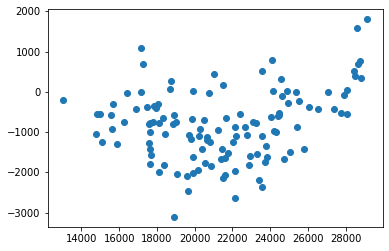

In [24]:
res_out=res[res<2500]
y_pred_out=???#TODO
plt.scatter(y_pred_out, res_out)

Le nuage de point montre que l'hypothèse d'homoscédasticité est raisonable. On observe par ailleurs une légère tendance quadratique. Cela peut nous suggérer des tranformations traitées en section 6.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 5 Cas des variables catégorielles

Il est tout à fait possible de gérer des variables catégorielles (des facteurs) dans un modèle de regression linéaire. Reprenons les données en incluant cette fois les non fumeurs, toujours en gardant les individus dont l'indice de masse corporelle est inférieur à $30$ uniquement.

In [25]:
data_cat=data[data['bmi']<30]

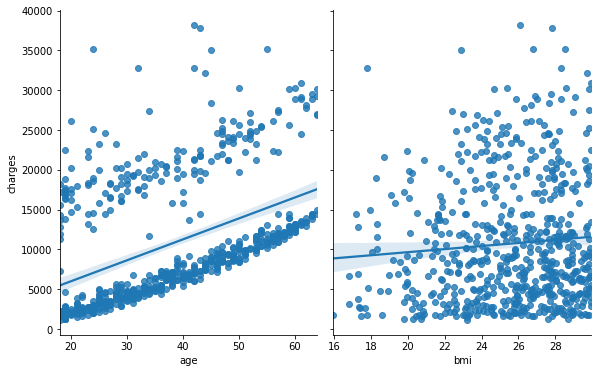

In [26]:
sns.pairplot(data_cat, x_vars=["age","bmi"], y_vars=["charges"],height=5, aspect=.8, kind="reg");

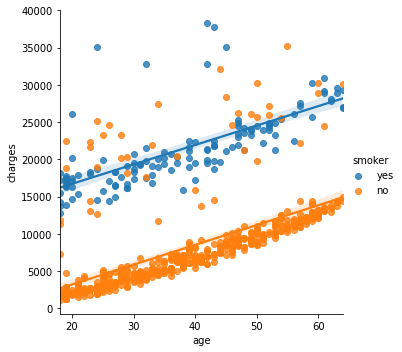

In [27]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data_cat)

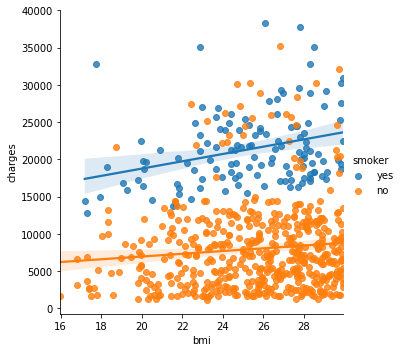

In [28]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data_cat)

On observe donc que la variable catégorielle 'smoker' explique bien les coûts. On peut donc l'encoder dummy (elle a deux niveaux) afin de la rajouter au modèle linéaire qui devient :
<center>charges $=\beta_0$ +$\beta_1 \times \text{age} +\beta_2 \times$ bmi +$\beta_3 \times$ smoker+$\epsilon$ </center>
avec 'smoker' qui vaut $1$ si l'individu est un fumeur et $0$ sinon.

In [29]:
data_cat=data_cat.replace(['yes','no'],[1,0])
data_cat.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
7,37,female,27.740,3,0,northwest,7281.50560


In [30]:
regr_cat = LinearRegression()
X = data_cat[['age', 'bmi','smoker']]
y = data_cat.charges
regr_cat.fit(X,y)
print(regr_cat.coef_)
print(regr_cat.intercept_)

[  261.75917179   133.88486409 13452.56932777]
-5380.891400587967


<u>Avec une variable à plus de $2$ catégories</u>.

Par exemple, avec la variable 'region' qui a $4$ catégories : northeast, southeast, southwest, northwest, on crée les variables one-hot correspondantes, et le modèle linéaire avec 'age', 'bmi' et 'region' devient :

$$charges=\beta_0+\beta_1 \times age + \beta_2 \times bmi + \beta_3 \times x_{southeast}+\beta_4 \times x_{southwest}+\beta_5 \times x_{northeast}+\beta_6\times x_{northwest}$$

où $x_{southeast}$ (respectivement $x_{southwest}$, $x_{northeast}$, $x_{northwest}$) vaut $1$ si 'region' est à 'southeast' (respectivement  'southwest', 'northeast', 'northwest') et $0$ sinon. 

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 6 Interaction et non-linéarité

### 6-1 Interaction : éliminer l'hypothèse d'additivité

Le modèle linéaire que nous avons considéré juqu'ici *découple* l'effet des variables entre elles. En d'autres termes, on considère que l'effet d'ajouter un an de plus est complètement indépendant de l'indice de masse corporelle (et réciproquement). 

Ceci n'est pas nécessairement exact. Il se peut que l'influence simulatée des deux variables ne soit pas additive.

Une manière de modifier ce comportement pour rendre compte d'une éventuelle interaction est d'introduire un prédicteur pour un terme d'interaction sous la forme 'age'x'bmi' : 
$$
charges \sim \beta_0 + \beta_1 age + \beta_2 bmi + \beta_3 age.bmi
$$

L'effet se comprend aisément en ré-écrivant cette relation sous la forme

$$
charges \sim \beta_0 + (\beta_1+\beta_3 bmi) age + \beta_2 bmi
$$
qui montre bien que cette fois le coefficient de 'age' est directement lié à 'bmi'. 

Voyons comment quel impact cela a sur notre modèle.

In [31]:
data_init['age_bmi']=data_smoker[data_smoker['bmi']<30]['age']*data_smoker[data_smoker['bmi']<30]['bmi']

In [32]:
regr_syn = LinearRegression()
X = data_init[['age','bmi','age_bmi']]
y = data_init.charges
regr_syn.fit(X,y)
print(regr_syn.coef_)
print(regr_syn.intercept_)

[ 75.62999879 171.40631029   6.90792932]
7526.5484591526


In [33]:
y_pred_syn=regr_syn.predict(X)

In [34]:
RSE=np.sqrt( sum((data_init['charges']-y_pred_syn)**2)/(n-p-1)  )
print(RSE)

3423.978872755492


In [35]:
r2_score(data_init['charges'],y_pred_syn)

0.5504701419166282

### 6-2 Non-linéarité

Comme discuté plus haut, le modèle linéaire fait l'hypothèse d'une relation linéaire entre la réponse et les prédicteurs. Cependant, dans certains cas, la véritable relation peut être non-linéaire.

On peut rajouter de nouvelles variables, transformations non-linéaires des variables originales, comme vu dans le cours de features enginering.

Par exemple, rajoutons à notre modèle la variable 'bmi'$^2$.

In [36]:
data_init['bmi2']=np.power(data_smoker[data_smoker['bmi']<30]['bmi'],2)

In [54]:
regr2 = LinearRegression()
X = data_init[['age','bmi','bmi2','age_bmi']]
y = data_init.charges
regr2.fit(X,y)
print(regr2.coef_)
print(regr2.intercept_)

[ 129.33237085 -987.38565522   25.23370243    4.94021029]
20299.83745918533


In [55]:
y_pred2=regr2.predict(X)

In [56]:
RSE_4=np.sqrt( sum((data_init['charges']-y_pred2)**2)/(n-p-1)  )
print(RSE_4)

3413.486110903936


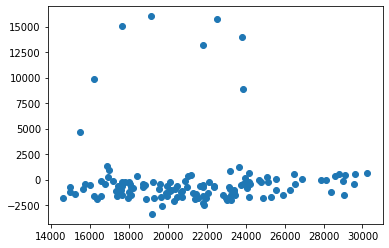

In [57]:
res2=(data_init['charges']-y_pred2)
plt.scatter(y_pred2, res2)

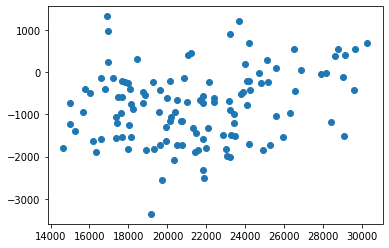

In [58]:
res_out2=res2[res2<2500]
y_pred_out2=y_pred2[res2<2500]
plt.scatter(y_pred_out2, res_out2)

In [59]:
R2_4=r2_score(data_init['charges'],y_pred2)
print(R2_4)

0.5532210832069002


Lorsque l'on rajoute des termes polynomiaux, on parle de *régression polynomiale*. On peut également ajouter les transformations $\log(\cdot)$, $1/x$, $\sqrt{x}$ voire même $\cos(\cdot)$,$\sin(\cdot)$ si il y a un effet périodique ...

Il faut bien avoir à l'esprit que la régression linéaire est **linéaire en les coefficients $\beta_i$**.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 7 Outliers

Les outliers n'ont pas un fort impact sur la pente lorsque l'on garde les $2$ variable explicatives initiales 'age' et 'bmi'. Reprenons le modèle fumeur/bmi<30 sans les $8$ outliers identifiés et voyons comment nos coefficients en sont modifiés.

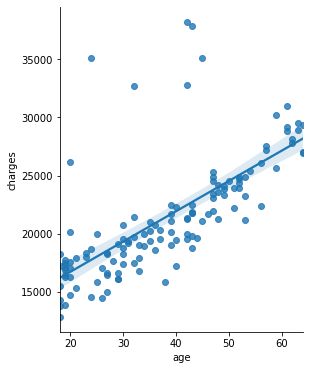

In [43]:
sns.pairplot(data_init, x_vars=["age"], y_vars=["charges"],height=5, aspect=.8, kind="reg");

In [44]:
data_out=data_init[data_init['charges']<32000]

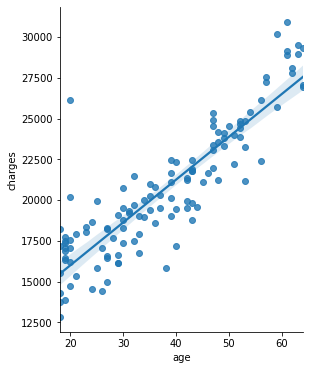

In [45]:
sns.pairplot(data_out, x_vars=["age"], y_vars=["charges"],height=5, aspect=.8, kind="reg");

In [49]:
#estimer les paramètres du modèle
regr_out = LinearRegression()
X_out = data_out[['age', 'bmi']]
y_out = data_out.charges
regr_out.fit(X_out,y_out)
print(regr_out.coef_)
print(regr.coef_)
print('\n')
print(regr_out.intercept_)
print(regr.intercept_)

[255.30470615 434.93975091]
[253.70939145 412.63676044]


14.77822962787468
1319.516863009776


L'impact est cependant très fort avec les $2$ nouvelles variables 'age'x'bmi' et 'bmi2'.

In [50]:
#estimer les paramètres du modèle
regr_out_tot = LinearRegression()
X_out_tot = data_out[['age', 'bmi','age_bmi','bmi2']]
y = data_out.charges
regr_out_tot.fit(X_out_tot,y)
print(regr_out_tot.coef_)
print(regr2.coef_)
print('\n')
print(regr_out_tot.intercept_)
print(regr2.intercept_)

[ 31.58376005 566.53618148   8.64532868  -8.89945896]
[ 129.33237085 -987.38565522   25.23370243    4.94021029]


2629.6457174343122
20299.83745918533


In [60]:
y_pred_out=regr_out.predict(X_out)
RSE_out=np.sqrt( sum((data_out['charges']-y_pred_out)**2)/(n-p-1)  )
print('Evaluation du modèle sans outliers et 2 variables prédictives')
print(RSE_out)
print(r2_score(data_out['charges'],y_pred_out))
print('\n')
print('Evaluation du modèle avec outliers et 2 variables prédictives')
print(RSE_init)
print(R2_init)
print('\n')
y_pred_out_tot=regr_out_tot.predict(X_out_tot)
RSE_out_tot=np.sqrt( sum((data_out['charges']-y_pred_out_tot)**2)/(n-p-1)  )
print('Evaluation du modèle sans outliers et 4 variables prédictives')
print(RSE_out_tot)
print(r2_score(data_out['charges'],y_pred_out_tot))
print('\n')
print('Evaluation du modèle avec outliers et 4 variables prédictives')
print(RSE_4)
print(R2_4)

Evaluation du modèle sans outliers et 2 variables prédictives
1349.444815743158
0.887269063342871


Evaluation du modèle avec outliers et 2 variables prédictives
3435.178940257978
0.5475244465889962


Evaluation du modèle sans outliers et 4 variables prédictives
1308.3082252516438
0.894037303715893


Evaluation du modèle avec outliers et 4 variables prédictives
3413.486110903936
0.5532210832069002


<u>Commentaire</u>. Les outliers ont un fort impact sur les outils d'évaluation du modèle RSE et $R^2$ et donc sur l'interprétation des résultats.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 8 Colinéarité et corrélation

En régression linéaire, la colinéarité désigne le fait que deux variables explicatives $X_1$ et $X_2$ soient linéairement dépendantes : $$\exists(\lambda_0,\lambda_1),~~~~X_2=\lambda_0 + \lambda_1 X_1.$$

<u>Remarque</u> : cela correspond bien au fait que plusieurs colonnes de la matrice $\boldsymbol{X}$ sont linéairement dépendantes.

Dans ce cas :
- il est difficile de distinguer l'influence de $X_1$ et de $X_2$ sur la réponse $Y$
- la matrice $M=X^T X$ n'est pas inversible.
- si il y a ''presque'' colinéarité entre $X_1$ et $X_2$, avec une relation du type $X_2=\lambda_0 + \lambda_1 X_1+\epsilon$, alors la matrice $M=X^T X$ est *mal conditionnée*, c'est à dire que la solution numérique de l'équation $Mz=y$ (inconnue $z$) risque d'être inexploitable.

Illustrons tout d'abord le caractère mal conditionné d'une matrice.

In [62]:
M=np.array([[7, 1, 11, 10],[2, 6, 5, 2],[8, 11, 3, 8], [6, 9, 3, 6]])
print(M)
print('Conditionnement : ')
print(np.linalg.cond(M))

[[ 7  1 11 10]
 [ 2  6  5  2]
 [ 8 11  3  8]
 [ 6  9  3  6]]
Conditionnement : 
1424.9502711294151


Le conditionnement, ou *condition number* en anglais, indique à quel point la matrice est mal conditionnée : plus il est grand, plus la matrice est mal conditionnée. Algébriquement, ce nombre est $\frac{|\text{plus grande valeur propre de la matrice}|}{|\text{plus petite valeur propre de la matrice}|}$.

In [63]:
y=np.array([29,15,30,24])
print(y)

[29 15 30 24]


In [64]:
beta=np.linalg.inv(M)@y
print(beta)

[1. 1. 1. 1.]


In [65]:
y_p=y+np.array([0.1,-0.1,0.1,-0.1])
print(y_p)
beta_p=np.linalg.inv(M)@y_p
print(beta_p)

[29.1 14.9 30.1 23.9]
[ 6.22222222  0.13333333  1.63333333 -3.25555556]


Ainsi, avec une matrice mal conditionnée, un tout petit changement dans les données entraîne un grand changement de la valeur des coefficients.

Pour éviter de telles situations, il est souhaitable d'identifier et de traiter les problèmes de colinéarité avant d'ajuster le modèle. Pour cela, on peut regarder les corrélations entre variables car si elles sont colinéaires (au sens défini ici), alors elles seront fortement corrélées. 

Ces considérations justifient également le fait que lorsque l'on encode une variable catégorielle à deux niveaux, on utilise systématiquement l'encodage dummy : on aurait sinon deux variables colinéaires.

Il est également possible d'observer une colinéarité entre plus que deux variables, par exemple :
$X_3=\lambda_0+\lambda_1 X_1 +\lambda_2 X_2$. On parle de multicolinéarité. Il existe alors des méthodes pour les détecter, que nous ne developperons pas ici. 

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 9 Effet de la mise à l'échelle

On a déjà mentionné que la mise à l'échelle n'impacte pas une régression linéaire.

Si on translate une feature (comme dans la mise à l'échelle min-max et dans la standardisation), les coefficents $\hat{\beta}_i$ restent inchangés. Montrons-le sur le coefficient $\hat{\beta}_1$ de la régression simple :

$$\hat{\beta_1}=\frac{\sum_{i=1}^{N} (y_i -\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N} (x_i-\bar{x})^{2}}$$

Si on transforme $x_i$ en $x_i - c$ ($c=\min_i x_i$ dans la mise à l'échelle min-max et $c=\frac{1}{n}\sum_{i=1}^{n} x_i$ dans la standardisation), on obtient :

$$\frac{\sum_{i=1}^{N} (y_i -\bar{y})( (x_i-c)-(\bar{x}-c))}{\sum_{i=1}^{N} ( (x_i-c)-(\bar{x}-c))^{2}}=\hat{\beta}_1$$

Si on divise $x_i$ par un facteur $c$ ($c=\max_i x_i-\min_i x_i$ dans la mise à l'échelle min-max et $c=std(x_i)$ dans la standardisation), on obtient :

$$\frac{\sum_{i=1}^{N} (y_i -\bar{y})( x_i/c-\bar{x}/c)}{\sum_{i=1}^{N} ( x_i/c-\bar{x}/c)^{2}}=c\hat{\beta}_1$$

Ainsi :
- dans le modèle non mis à l'échelle, on avait le facteur : '$\beta_1 x_1$'
- dans le modèle mis à l'échelle, on a le facteur : '$c\beta_1 \frac{x_1}{c}$'='$\beta_1 x_1$'

On retrouve bien que la mise à l'échelle n'a pas d'impact sur la régression linéaire (sauf éventuellement sur l'intercept $\beta_0$).

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## Annexes

### Régression linéaire simple : calcul de $\hat{\beta}_0$ et $\hat{\beta}_1$

<u>Remarque</u> : on utilise le fait que $\min_y \min_y f(x,y) = \min_{x,y} f(x,y)$ pour une fonction quelconque $f$.

Notons $f(\beta_0) = \sum_{i=1}^{n} \left(y_i - \beta_0 -\beta_1 x_i \right)^2$. $f$ est une fonction polynomiale de degré $2$ (de coefficient positif devant le monôme de plus haut degré) donc le minimum global est atteint en $\beta_0$ tel que $f'(\beta_0)=0$.
$$f'(\beta_0)=-2\sum_{i=1}^{n}(y_1-\beta_0-\beta_1x_i)$$
et donc $$f'(\beta_0)=0~~\text{pour}~~\sum_{i=1}^{n}(y_1-\beta_0-\beta_1x_i)=0$$
soit 
$$\sum_{i=1}^{n}y_i-n\beta_0-\sum_{i=1}^{n}\beta_1 x_i=0$$
d'où le résultat.

Considérons maintenant $g(\beta_1) = \sum_{i=1}^{n} \left(y_i - \beta_0 -\beta_1 x_i \right)^2$. Alors
$$g(\beta_1)=\sum_{i=1}^{n}\left(y_i^2 - 2y_i(\beta_0 + \beta_1 x_i)+(\beta_0+\beta_1x_i)^2\right)$$

$g$ est une fonction polynomiale de degré $2$ (de coefficient positif devant le monôme de plus haut degré) donc le minimum global est atteint en $\beta_1$ tel que $g'(\beta_1)=0$.

On dérive :
$$g'(\beta_1)=\sum_{i=1}^{n}\left(-2y_ix_i+2(\beta_0+\beta_1x_i)x_i \right) $$
et donc $$g'(\beta_1)=0~~\text{pour}~~-\sum_{i=1}^{n}y_ix_i+\beta_0\sum_{i=1}^{n}x_i +\beta_1\sum_{i=1}^{n}x_i^2=0 $$
On remplace $\beta_0$ par la valeur trouvée avant :
$$-\sum_{i=1}^{n}y_ix_i+(\bar{y}-\beta_1\bar{x})\sum_{i=1}^{n}x_i +\beta_1\sum_{i=1}^{n}x_i^2=0$$

On réordonne les termes :
$$-\left(\sum_{i=1}^{n}y_ix_i-\bar{y}\sum_{i=1}^{n}x_i\right)+\beta_1\left(\sum_{i=1}^{n}x_i^2-\bar{x}\sum_{i=1}^{n}x_i\right)=0$$



Ce qui donne, en utilisant $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$ et $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$ et en divisant l'expression par $n$ :

$$-\underbrace{\left(\frac{1}{n}\sum_{i=1}^{n}y_i x_i-\bar{y}\bar{x}\right)}_{=\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})(x_i-\bar{x})}+\beta_1\underbrace{\left(
\frac{1}{n}\sum_{i=1}^{n}x_i^2 -\bar{x}^2\right)}_{=\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\bar{x}^2\right)}  =0 $$

D'où le résultat.

### Régression linéaire multiple : calcul de $\boldsymbol{\beta}$

On cherche

$$\min_{\boldsymbol{\beta}\in\mathbb{R}^{p+1}}f(\boldsymbol{\beta})$$

avec

$$f(\boldsymbol{\beta})=\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^{T}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right) $$

Sous les hypothèses données dans le cours ci-dessus, le minimum global est atteint pour $\boldsymbol{\beta}$ vérifiant $\frac{\partial f}{\partial \boldsymbol{\beta}}(\boldsymbol{\beta})=0$.

On a :

$$f(\boldsymbol{\beta})=\boldsymbol{y}^T\boldsymbol{y} - \boldsymbol{y}^T\boldsymbol{X}\boldsymbol{\beta}- \boldsymbol{\beta}^{T}\boldsymbol{X}^T\boldsymbol{y}+\boldsymbol{\beta}^{T}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} $$

On rappelle les formules suivantes (voir par exemple [ici](http://cesp.vjf.inserm.fr/M2SPR/pdf/polmat02009.pdf), page 53) :

\begin{align*}
&\text{Soient}\ v , a \in \mathbb{R}^k : \frac{\partial v^{T} a}{\partial v}=\frac{\partial a^{T} v}{\partial v}=a\\
&\text{Soient}\ v \in \mathbb{R}^k,\ M\in\mathbb{R}^{k\times k}  : \frac{\partial v^{T} Mv}{\partial v}=(M+M^{T})v
\end{align*}

On applique ces formules avec $a=\boldsymbol{X}^T\boldsymbol{y}$ et $M=\boldsymbol{X}^T\boldsymbol{X}$.

On trouve :
$$\frac{\partial f}{\partial \boldsymbol{\beta}}(\boldsymbol{\beta})=-2\boldsymbol{X}^T\boldsymbol{y}+2\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta} $$

D'où le résultat.